# Test NeuralNet class

### Small code to test NeuralNet class 

In [2]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

We separate the data into X_train, X_test, y_train and y_test.

In [10]:
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

y = df['SalePrice'].values
X = df.drop('SalePrice', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then we normalize X_train, X_test, y_train, and y_test using MinMaxScaler so they can be used for the neural network.

In [11]:
scaler_X = MinMaxScaler()

Xn_train = scaler_X.fit_transform(X_train)
Xn_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()

yn_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
yn_test  = scaler_y.transform(y_test.reshape(-1, 1))

yn_train = yn_train.ravel()
yn_test = yn_test.ravel()

We create a NeuralNet instance to begin training, make predictions, and plot the training and validation errors to observe their evolution across epochs.

In [12]:
nn = NeuralNet(layers=[Xn_train.shape[1], 64, 32, 1], function='tanh')
nn.fit(Xn_train, yn_train)

Epoch 0/1000 - Training Error: 0.020476 - Validation Error: 0.017839
Epoch 100/1000 - Training Error: 0.005375 - Validation Error: 0.006254
Epoch 200/1000 - Training Error: 0.004197 - Validation Error: 0.006002
Epoch 300/1000 - Training Error: 0.004276 - Validation Error: 0.005845
Epoch 400/1000 - Training Error: 0.003648 - Validation Error: 0.005996
Epoch 500/1000 - Training Error: 0.003418 - Validation Error: 0.005833
Epoch 600/1000 - Training Error: 0.002986 - Validation Error: 0.005565
Epoch 700/1000 - Training Error: 0.003352 - Validation Error: 0.005600
Epoch 800/1000 - Training Error: 0.002751 - Validation Error: 0.005660
Epoch 900/1000 - Training Error: 0.002788 - Validation Error: 0.005663


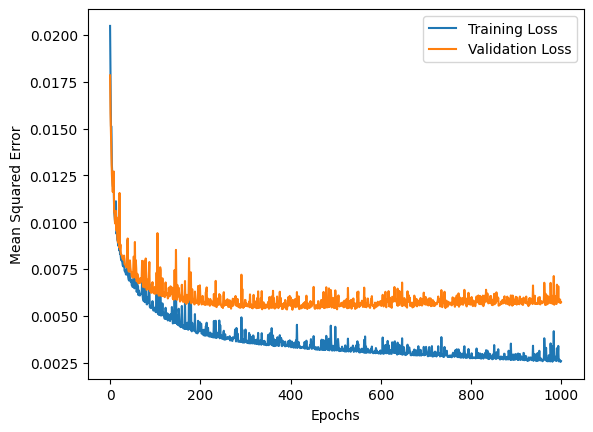

Predictions: [0.52200496 0.52029331 0.38521765 0.3180745  0.4971406  0.50556619
 0.48936857 0.63140559 0.39011009 0.28008247 0.51162284 0.40363549
 0.38450424 0.4356039  0.33347236 0.87467973 0.93586855 0.45220356
 0.39206643 0.45018307 0.30279031 0.6637659  0.42680825 0.63273688
 0.43970683 0.41016488 0.33829895 0.00344364 0.46995756 0.47188322
 0.35541749 0.31134889 0.48370808 0.25339884 0.51774329 0.87912031
 0.175732   0.39937939 0.67371787 0.30426415 0.4134984  0.2575789
 0.20908367 0.42116844 0.33157202 0.12380044 0.29654599 0.3853332
 0.4812409  0.8461376  0.63958383 0.03799298 0.88978817 0.25442393
 0.37036495 0.29796992 0.19360687 0.62550433 0.33546723 0.62293056
 0.43519942 0.75489324 0.9159022  0.75498954 0.20876843 0.29306772
 0.43222468 0.58776311 0.21249645 0.50517315 0.63840067 0.79347709
 0.25084636 0.31696509 0.63380206 0.1887504  0.6412316  0.01568412
 0.58365002 0.54183026 0.42954217 0.74772402 0.36010568 0.12684855
 0.32062712 0.36950825 0.38663801 0.3990309  0.4524

In [13]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

predictions = nn.predict(Xn_test)
print("Predictions:", predictions.flatten())

We plot the normalized predicted and real values.

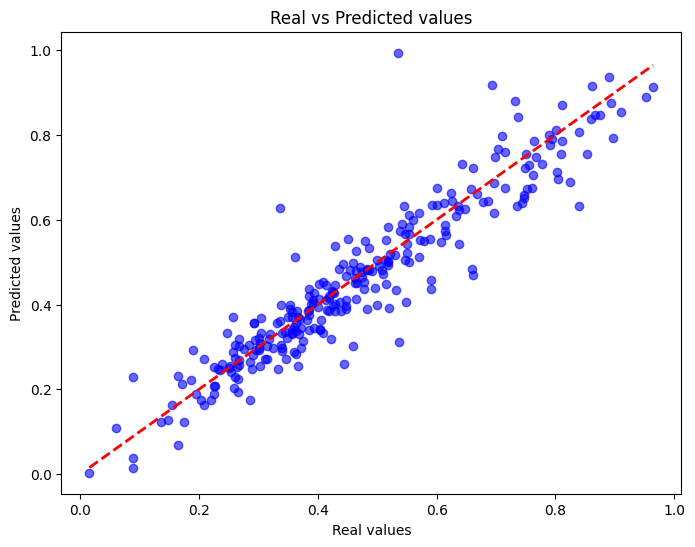

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()

We denormalize the data to plot the house prices.

In [15]:
scaler_X.data_min_
scaler_X.data_max_

scaler_y.data_min_
scaler_y.data_max_

# X_train_denorm = scaler_X.inverse_transform(Xn_train)
# X_test_denorm  = scaler_X.inverse_transform(Xn_test)

y_train_denorm = scaler_y.inverse_transform(yn_train.reshape(-1,1))
y_test_denorm  = scaler_y.inverse_transform(yn_test.reshape(-1,1))

In [16]:
pred_train = nn.predict(Xn_train)
pred_test = nn.predict(Xn_test)

In [17]:
y_pred_test = scaler_y.inverse_transform(pred_test.reshape(-1,1))
y_pred_train = scaler_y.inverse_transform(pred_train.reshape(-1,1))

mape_train = np.mean(np.abs((y_train_denorm - y_pred_train) / y_train_denorm)) * 100
mape_test = np.mean(np.abs((y_test_denorm - y_pred_test) / y_test_denorm)) * 100

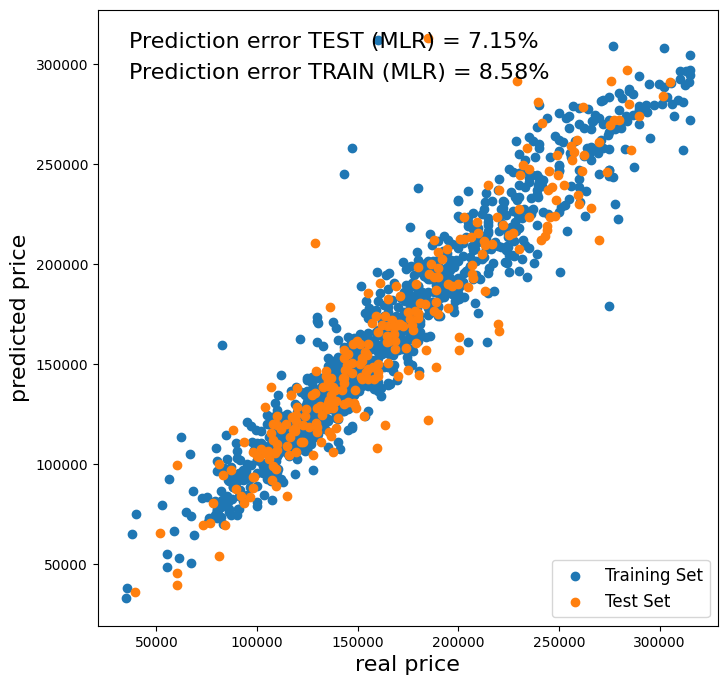

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train_denorm, y_pred_train, label='Training Set')
ax.scatter(y_test_denorm, y_pred_test, label='Test Set')
ax.set_xlabel("real price", fontsize=16)
ax.set_ylabel("predicted price", fontsize=16)

ax.text(0.05, 0.9, "Prediction error TEST (MLR) = %.2f%%\n" % mape_train, transform=ax.transAxes, fontsize=16)
ax.text(0.05, 0.85, "Prediction error TRAIN (MLR) = %.2f%%\n" % mape_test, transform=ax.transAxes, fontsize=16)

ax.legend(loc='lower right', fontsize=12)
plt.show()